In [1]:
# load the autoreload extension
%load_ext autoreload
# set the level of reloading
%autoreload 2

from util import *
import torch
from heuristic.heuristic_solver import HeuristicSolver
from spo_model import SPOModel
from nce_model import NCEModel
from tqdm import tqdm

from two_stage_model import TwoStageModel


# 0. Load data

In [2]:
data = [parse_datafile(f'../data/cvrp_10000_10_4_4_0.1/instance_{i}') for i in tqdm(range(5_000))]

TRAIN_PERCENTAGE, VALIDATION_PERCENTAGE, TEST_PERCENTAGE = 0.75, 0.05, 0.20
num_train, num_val, num_test = int(len(data) * TRAIN_PERCENTAGE), int(len(data) * VALIDATION_PERCENTAGE), int(len(data) * TEST_PERCENTAGE)
vrps_train, vrps_val, vrps_test = data[:num_train], data[num_train:num_train + num_val], data[num_train + num_val:]
print(f'Number of training instances: {len(vrps_train)}, validation instances: {len(vrps_val)}, test instances: {len(vrps_test)}')

100%|██████████| 5000/5000 [00:24<00:00, 205.73it/s]

Number of training instances: 3750, validation instances: 250, test instances: 1000


# 1. 2-stage model

Epoch 0: Train Loss: 27461.602101359353 | Validation Loss: 22037.27520647916
Epoch 1: Train Loss: 18913.685230744486 | Validation Loss: 17361.021406347103
Epoch 2: Train Loss: 17409.28294521139 | Validation Loss: 17306.375316966663
Epoch 3: Train Loss: 17368.510340120505 | Validation Loss: 17277.403385509144
Epoch 4: Train Loss: 17340.811285199583 | Validation Loss: 17484.790489543568
Epoch 5: Train Loss: 17317.757954176563 | Validation Loss: 17276.899005196312
Epoch 6: Train Loss: 17297.473011338385 | Validation Loss: 17227.291958895596
Epoch 7: Train Loss: 17280.912012825218 | Validation Loss: 17199.585857391357
Epoch 8: Train Loss: 17266.933845043317 | Validation Loss: 17219.625030170788
Epoch 9: Train Loss: 17255.961229741908 | Validation Loss: 17180.305644295433
Epoch 10: Train Loss: 17246.156382625744 | Validation Loss: 17171.05064045299
Epoch 11: Train Loss: 17238.4416286432 | Validation Loss: 17167.161446311256
Epoch 12: Train Loss: 17232.179644907912 | Validation Loss: 17158.8

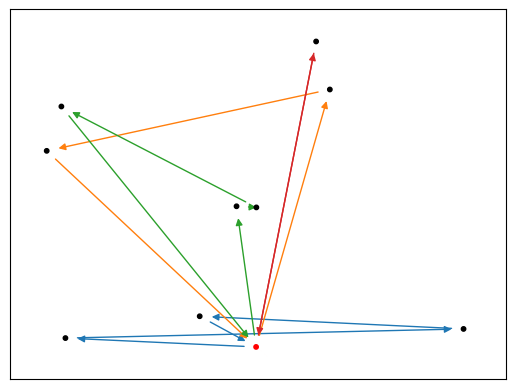

Drawing predicted solution


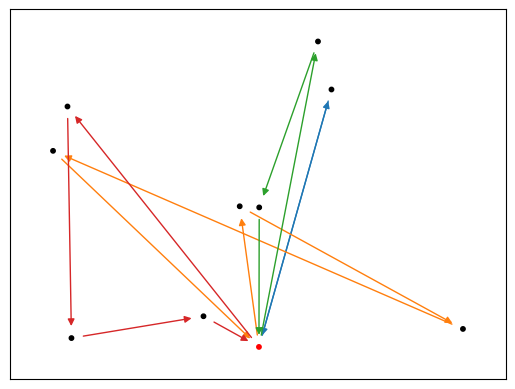

Actual edges (13): [0 -> 1, 0 -> 3, 0 -> 4, 0 -> 7, 1 -> 6, 2 -> 0, 3 -> 2, 4 -> 8, 5 -> 0, 6 -> 5, 7 -> 0, 8 -> 9, 9 -> 0]
Predicted edges (13): [0 -> 3, 0 -> 4, 0 -> 7, 0 -> 9, 1 -> 5, 2 -> 0, 3 -> 0, 4 -> 6, 5 -> 0, 6 -> 2, 7 -> 8, 8 -> 0, 9 -> 1]
Correct edges (5): {0 -> 7, 0 -> 4, 0 -> 3, 2 -> 0, 5 -> 0}


100%|██████████| 1000/1000 [01:43<00:00,  9.64it/s]

Accuracy: 0.1728990842490847, cost comparison: 2.464164948363056, regret: 618.2482616447844


In [3]:
model = TwoStageModel(vrps_train, vrps_val, vrps_test, lr=1e-4)
model.train()
model.test()
test_and_draw(model, vrps_test[0])
test(model, vrps_test, HeuristicSolver)

# 2a. SPO+ model (using true costs during training)

In [4]:
spo_model = SPOModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=8e-3)
spo_model.train(epochs=20, verbose=False, test_every=5)

3750it [00:23, 159.51it/s]


Epoch 1 / 20 done, mean loss: 2414.683690169271, validation loss: 2000.0655517578125


3750it [00:25, 146.58it/s]


Epoch 2 / 20 done, mean loss: 1544.9897658040366, validation loss: 1380.7554931640625


3750it [00:28, 129.89it/s]


Epoch 3 / 20 done, mean loss: 991.8187364257813, validation loss: 1012.71337890625


3750it [00:32, 114.59it/s]


Epoch 4 / 20 done, mean loss: 675.6362898111979, validation loss: 803.5091552734375


3750it [00:36, 102.57it/s]


Epoch 5 / 20 done, mean loss: 490.5270083984375, validation loss: 686.3322143554688


100%|██████████| 1000/1000 [00:14<00:00, 70.22it/s]


Accuracy: 0.5831881368631372, cost comparison: 1.1671872394791012, regret: 70.59533851886391


3750it [00:40, 91.85it/s] 


Epoch 6 / 20 done, mean loss: 373.0855850748698, validation loss: 611.612060546875


3750it [00:44, 84.61it/s]


Epoch 7 / 20 done, mean loss: 294.45966884765625, validation loss: 567.205810546875


3750it [00:47, 79.63it/s]


Epoch 8 / 20 done, mean loss: 238.34433123372395, validation loss: 539.197021484375


3750it [00:49, 75.40it/s]


Epoch 9 / 20 done, mean loss: 197.93976591796874, validation loss: 516.472412109375


3750it [00:52, 71.20it/s]


Epoch 10 / 20 done, mean loss: 165.44888712565105, validation loss: 498.2635498046875


100%|██████████| 1000/1000 [00:15<00:00, 63.91it/s]


Accuracy: 0.590006747419248, cost comparison: 1.1628424233770502, regret: 68.76072623336734


3750it [00:52, 71.97it/s]


Epoch 11 / 20 done, mean loss: 141.3029110514323, validation loss: 488.9023132324219


3750it [00:54, 69.26it/s]


Epoch 12 / 20 done, mean loss: 120.26542756347656, validation loss: 484.30255126953125


3750it [00:55, 67.51it/s]


Epoch 13 / 20 done, mean loss: 104.66257102864583, validation loss: 478.5087585449219


3750it [00:56, 66.03it/s]


Epoch 14 / 20 done, mean loss: 89.72544587402344, validation loss: 480.5330810546875


3750it [00:59, 63.07it/s]


Epoch 15 / 20 done, mean loss: 78.54476912434896, validation loss: 475.5933837890625


100%|██████████| 1000/1000 [00:15<00:00, 63.18it/s]


Accuracy: 0.5899530760905763, cost comparison: 1.1706536346046503, regret: 72.05903477995818


3750it [00:59, 62.84it/s]


Epoch 16 / 20 done, mean loss: 68.75892027994792, validation loss: 475.5257568359375


3750it [00:59, 62.82it/s]


Epoch 17 / 20 done, mean loss: 60.5419363688151, validation loss: 474.9947509765625


3750it [00:58, 63.65it/s]


Epoch 18 / 20 done, mean loss: 53.96177170817057, validation loss: 477.27288818359375


3750it [00:58, 63.80it/s]


Epoch 19 / 20 done, mean loss: 46.898741837565105, validation loss: 480.62164306640625


3750it [01:00, 61.97it/s]


Epoch 20 / 20 done, mean loss: 42.36695496419271, validation loss: 479.88970947265625


100%|██████████| 1000/1000 [00:16<00:00, 61.87it/s]

Accuracy: 0.5861214701964701, cost comparison: 1.171297160532028, regret: 72.33076562993479


Actual objective: 501.0885460646285


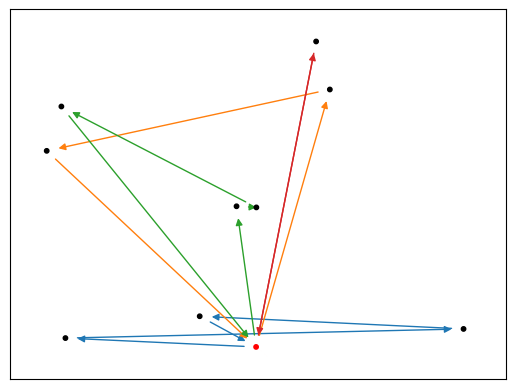

Predicted objective: 549.6295264070104


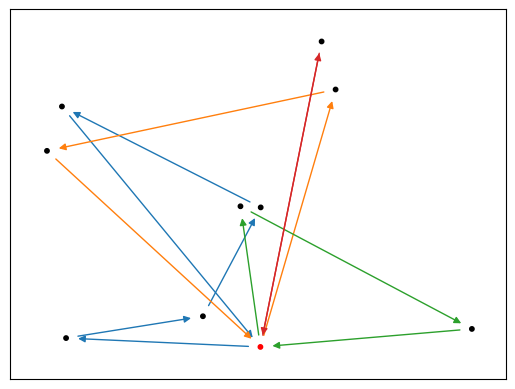

In [5]:
spo_model.cost_model.eval()
vrp = vrps_test[0]
costs = spo_model.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)

# 2b. SPO+ model (without using true costs during training)

In [12]:
from spo_model import SPOModelNoTrueCosts

spo_model_no_true_costs = SPOModelNoTrueCosts(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=8e-3)
spo_model_no_true_costs.train(epochs=20, verbose=False, test_every=5)

3750it [00:42, 88.62it/s] 


Epoch 1 / 20 done, mean loss: -427.59002380777997, validation loss: -440.51727294921875


3750it [00:49, 76.25it/s]


Epoch 2 / 20 done, mean loss: -470.68099353027344, validation loss: -462.6964111328125


3750it [00:52, 71.97it/s]


Epoch 3 / 20 done, mean loss: -501.77498819986977, validation loss: -483.4460754394531


3750it [00:54, 69.16it/s]


Epoch 4 / 20 done, mean loss: -528.2329216715494, validation loss: -496.5090026855469


3750it [00:53, 69.91it/s]


Epoch 5 / 20 done, mean loss: -551.3130194051107, validation loss: -507.8954772949219


100%|██████████| 1000/1000 [00:14<00:00, 68.25it/s]


Accuracy: 0.5019672286047279, cost comparison: 1.3477305310235372, regret: 146.83031209459853


3750it [00:55, 67.88it/s]


Epoch 6 / 20 done, mean loss: -571.8109596679687, validation loss: -521.62451171875


3750it [00:56, 66.39it/s]


Epoch 7 / 20 done, mean loss: -590.4444132568359, validation loss: -529.8699951171875


3750it [00:57, 65.30it/s]


Epoch 8 / 20 done, mean loss: -608.778633178711, validation loss: -545.4212036132812


3750it [00:58, 64.48it/s]


Epoch 9 / 20 done, mean loss: -626.5617723144532, validation loss: -554.2091064453125


3750it [00:57, 64.69it/s]


Epoch 10 / 20 done, mean loss: -643.2721490804037, validation loss: -564.5994873046875


100%|██████████| 1000/1000 [00:15<00:00, 64.90it/s]


Accuracy: 0.5193520854145856, cost comparison: 1.3112793225291701, regret: 131.43867448458107


3750it [00:57, 64.96it/s]


Epoch 11 / 20 done, mean loss: -657.8962391357422, validation loss: -571.653564453125


3750it [00:57, 64.91it/s]


Epoch 12 / 20 done, mean loss: -672.8094283610026, validation loss: -579.4815673828125


3750it [00:57, 64.75it/s]


Epoch 13 / 20 done, mean loss: -687.105040600586, validation loss: -590.5427856445312


3750it [00:57, 65.46it/s]


Epoch 14 / 20 done, mean loss: -699.7248268880209, validation loss: -600.8211059570312


3750it [00:55, 67.56it/s]


Epoch 15 / 20 done, mean loss: -715.2185189127604, validation loss: -607.1192626953125


100%|██████████| 1000/1000 [00:14<00:00, 67.02it/s]


Accuracy: 0.5247507783882784, cost comparison: 1.3055756757468224, regret: 129.03029166394046


3750it [00:59, 63.17it/s]


Epoch 16 / 20 done, mean loss: -727.3482483805338, validation loss: -610.9489135742188


3750it [00:56, 66.61it/s]


Epoch 17 / 20 done, mean loss: -740.5106183024088, validation loss: -618.228759765625


3750it [00:56, 66.00it/s]


Epoch 18 / 20 done, mean loss: -752.5222003499349, validation loss: -627.082763671875


3750it [00:55, 67.48it/s]


Epoch 19 / 20 done, mean loss: -765.0260628336589, validation loss: -636.8411254882812


3750it [00:55, 67.26it/s]


Epoch 20 / 20 done, mean loss: -775.5212604003906, validation loss: -643.9296875


100%|██████████| 1000/1000 [00:15<00:00, 64.89it/s]

Accuracy: 0.528148484848485, cost comparison: 1.2958315079749556, regret: 124.91578612761667


Actual objective: 501.0885460646285


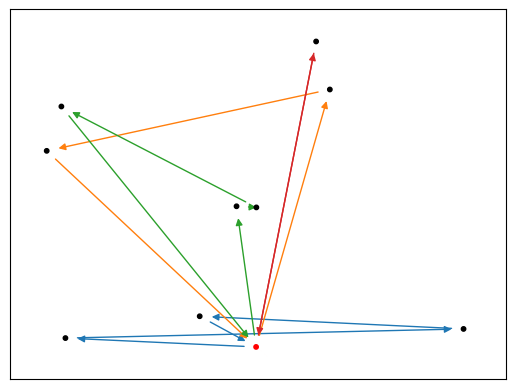

Predicted objective: 627.2980856750914


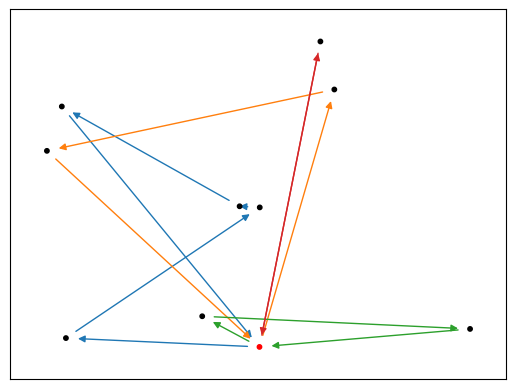

In [13]:
spo_model_no_true_costs.cost_model.eval()
vrp = vrps_test[0]
costs = spo_model_no_true_costs.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)

# 3a. NCE model (without using true costs during training)

In [6]:
nce_model = NCEModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=8e-3)
nce_model.train(epochs=20, verbose=False, test_every=5)

3750it [00:42, 88.25it/s] 


Epoch 1 / 20 done, mean loss: 25.35139989315669


3750it [00:48, 76.63it/s]


Epoch 2 / 20 done, mean loss: 11.036802715174357


3750it [00:54, 68.22it/s]


Epoch 3 / 20 done, mean loss: -29.25462860298157


3750it [00:59, 62.79it/s]


Epoch 4 / 20 done, mean loss: -74.1137738126119


3750it [01:01, 60.67it/s]


Epoch 5 / 20 done, mean loss: -123.58618643544514


100%|██████████| 1000/1000 [00:14<00:00, 69.90it/s]


Accuracy: 0.524715022477522, cost comparison: 1.314398103707835, regret: 132.75558966160162


3750it [01:05, 57.17it/s]


Epoch 6 / 20 done, mean loss: -176.03043199157716


3750it [01:07, 55.15it/s]


Epoch 7 / 20 done, mean loss: -230.680976910909


3750it [01:06, 56.47it/s]


Epoch 8 / 20 done, mean loss: -287.2639231848399


3750it [01:05, 57.56it/s]


Epoch 9 / 20 done, mean loss: -345.1611200398763


3750it [01:05, 57.48it/s]


Epoch 10 / 20 done, mean loss: -404.6584675793966


100%|██████████| 1000/1000 [00:15<00:00, 66.06it/s]


Accuracy: 0.5191764235764228, cost comparison: 1.3056058357008002, regret: 129.0430267995137


3750it [01:06, 56.65it/s]


Epoch 11 / 20 done, mean loss: -464.574844686381


3750it [01:05, 57.16it/s]


Epoch 12 / 20 done, mean loss: -525.3454633961995


3750it [01:05, 57.00it/s]


Epoch 13 / 20 done, mean loss: -585.8051939135233


3750it [01:05, 57.00it/s]


Epoch 14 / 20 done, mean loss: -646.0999819986979


3750it [01:05, 56.95it/s]


Epoch 15 / 20 done, mean loss: -706.7426473937988


100%|██████████| 1000/1000 [00:15<00:00, 62.79it/s]


Accuracy: 0.5157914127539122, cost comparison: 1.3096849639005774, regret: 130.76545153134256


3750it [01:05, 57.69it/s]


Epoch 16 / 20 done, mean loss: -767.3023304672241


3750it [01:05, 57.40it/s]


Epoch 17 / 20 done, mean loss: -827.7962462280274


3750it [01:05, 57.23it/s]


Epoch 18 / 20 done, mean loss: -888.3907717305501


3750it [01:06, 56.19it/s]


Epoch 19 / 20 done, mean loss: -948.9130134379069


3750it [01:05, 57.61it/s]


Epoch 20 / 20 done, mean loss: -1009.4488727457682


100%|██████████| 1000/1000 [00:15<00:00, 63.49it/s]

Accuracy: 0.5129588453213452, cost comparison: 1.3061474467285683, regret: 129.27172376209236


Actual objective: 501.0885460646285


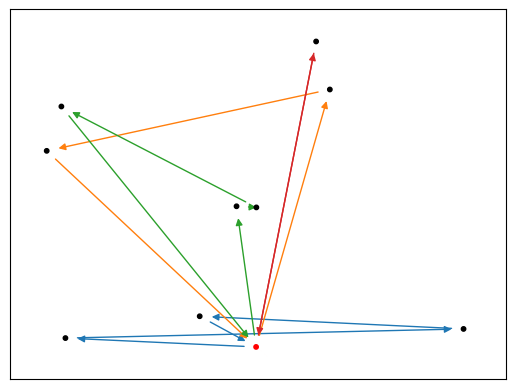

Predicted objective: 612.0798065047006


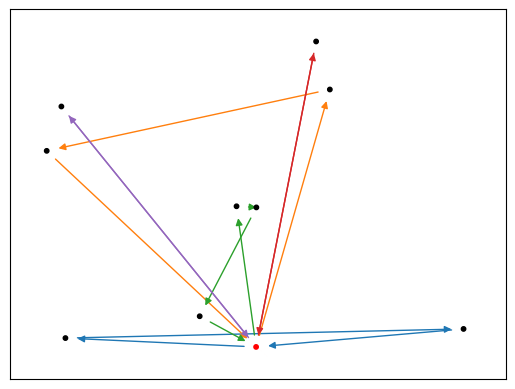

In [7]:
nce_model.cost_model.eval()
vrp = vrps_test[0]
costs = nce_model.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)

# 3b. NCE model (using true costs during training)

In [8]:
from nce_model import NCETrueCostLoss

nce_model_true_costs = NCEModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=8e-3)
nce_model_true_costs.criterion = NCETrueCostLoss({vrp: [vrp.actual_solution] for vrp in vrps_train})
nce_model.train(epochs=20, verbose=False, test_every=5)

3750it [01:05, 57.03it/s]


Epoch 1 / 20 done, mean loss: -1069.961648972575


3750it [01:05, 57.13it/s]


Epoch 2 / 20 done, mean loss: -1130.4051825236002


3750it [01:06, 56.35it/s]


Epoch 3 / 20 done, mean loss: -1190.7493180847168


3750it [01:08, 54.82it/s]


Epoch 4 / 20 done, mean loss: -1251.0410875691732


3750it [01:08, 54.63it/s]


Epoch 5 / 20 done, mean loss: -1311.471879393514


100%|██████████| 1000/1000 [00:16<00:00, 61.81it/s]


Accuracy: 0.515411575924076, cost comparison: 1.3053903901583084, regret: 128.9520542405305


3750it [01:08, 54.92it/s]


Epoch 6 / 20 done, mean loss: -1371.8815345987955


3750it [01:05, 57.08it/s]


Epoch 7 / 20 done, mean loss: -1432.155438791911


3750it [01:04, 58.12it/s]


Epoch 8 / 20 done, mean loss: -1492.464041373698


3750it [01:04, 58.33it/s]


Epoch 9 / 20 done, mean loss: -1552.8018098164875


3750it [01:04, 58.27it/s]


Epoch 10 / 20 done, mean loss: -1613.0889256266275


100%|██████████| 1000/1000 [00:15<00:00, 64.45it/s]


Accuracy: 0.5143011821511818, cost comparison: 1.3090756305919635, regret: 130.508158622347


3750it [01:02, 59.75it/s]


Epoch 11 / 20 done, mean loss: -1673.3134911071777


3750it [01:03, 59.44it/s]


Epoch 12 / 20 done, mean loss: -1733.6840004699707


3750it [01:04, 58.17it/s]


Epoch 13 / 20 done, mean loss: -1793.886053088379


3750it [01:03, 58.86it/s]


Epoch 14 / 20 done, mean loss: -1854.1042419962564


3750it [01:05, 57.31it/s]


Epoch 15 / 20 done, mean loss: -1914.415508943685


100%|██████████| 1000/1000 [00:15<00:00, 64.39it/s]


Accuracy: 0.5149682983682982, cost comparison: 1.3111669405281903, regret: 131.39122083065772


3750it [01:07, 55.60it/s]


Epoch 16 / 20 done, mean loss: -1974.7021465393066


3750it [01:02, 59.65it/s]


Epoch 17 / 20 done, mean loss: -2034.8956800842286


3750it [01:02, 59.96it/s]


Epoch 18 / 20 done, mean loss: -2095.1408503763832


3750it [01:02, 60.09it/s]


Epoch 19 / 20 done, mean loss: -2155.397625954183


3750it [01:02, 59.73it/s]


Epoch 20 / 20 done, mean loss: -2215.736098811849


100%|██████████| 1000/1000 [00:15<00:00, 63.26it/s]

Accuracy: 0.5153004870129868, cost comparison: 1.3144756272187865, regret: 132.78832420830378


Actual objective: 501.0885460646285


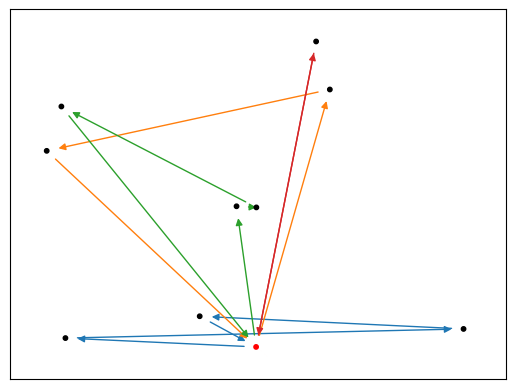

Predicted objective: 1882.9097207143418


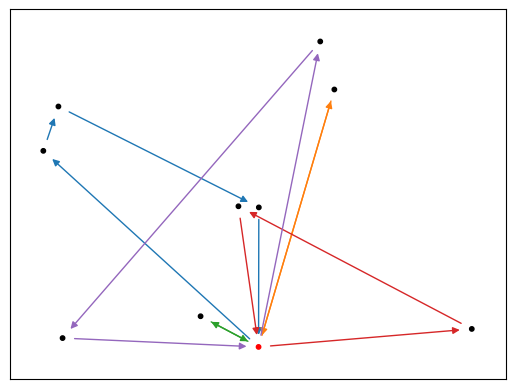

In [11]:
nce_model_true_costs.cost_model.eval()
vrp = vrps_test[0]
costs = nce_model_true_costs.cost_model(torch.tensor([edge.features for edge in vrp.edges]))
# set the predicted edge costs
for i, edge in enumerate(vrp.edges):
    edge.predicted_cost = costs[i].detach().item()

solver = GurobiSolver(vrp)
solver.solve()
print(f'Actual objective: {solver.get_actual_objective()}')
draw_solution(solver)

solver = GurobiSolver(vrp, mode=SolverMode.PRED_COST)
solver.solve()
print(f'Predicted objective: {solver.get_actual_objective()}')
draw_solution(solver)